In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [16]:
ci = pd.read_csv("../bootstrap/confidence_intervals_80.csv", index_col=0)
cutoff = pd.read_csv("../thresholds_relative_change/thresholds_one_decimal.csv", index_col=0)
percentage = pd.read_csv("cutpoint_values - percentage.tsv", index_col=0, delimiter='\t')

In [24]:
cutoff

,Aβ1-42_GMM,pTau_GMM,tTau_GMM,Aβ1-42_K-Means,pTau_K-Means,tTau_K-Means,Aβ1-42_Tertile,pTau_Tertile,tTau_Tertile,Aβ1-42_ROC,pTau_ROC,tTau_ROC,Aβ1-42_Mean ±2 SD,pTau_Mean ±2 SD,tTau_Mean ±2 SD
Cohort,,,,,,,,,,,,,,,
ADNI,983.7,34.3,352.3,973.0,28.1,286.2,832.1,21.5,240.5,801.7,24.2,264.8,280.8,40.9,409.7
EPAD,1034.9,27.7,306.7,1030.7,19.8,223.7,883.0,19.9,228.3,731.5,20.9,213.8,337.9,43.3,436.4
AIBL,714.4,92.6,591.5,689.9,77.7,635.3,-,-,-,-,-,-,-,-,-
ARWIBO,577.5,126.2,499.0,512.8,69.2,406.2,-,-,-,-,-,-,-,-,-
EDSD,737.5,113.2,535.7,790.8,82.8,577.7,-,-,-,-,-,-,-,-,-
PharmaCog,779.6,93.1,630.6,773.6,66.2,465.8,-,-,-,-,-,-,-,-,-
PREVENT-AD,1030.9,68.0,424.8,1150.4,50.3,301.6,1104.4,53.1,304.2,-,-,-,588.4,89.6,598.1
NACC_ELISA,596.2,80.8,537.4,591.4,61.1,497.4,629.0,48.0,376.6,474.0,64.0,468.0,291.5,88.0,728.8
EMIF_ELISA,730.9,81.4,523.8,723.7,65.0,435.1,538.2,52.1,269.4,560.0,59.0,355.4,173.1,95.1,669.4


In [18]:
percentage.replace({' %':''}, regex=True, inplace=True)

In [19]:
within = pd.DataFrame(index=cutoff.index, columns=cutoff.columns)

In [20]:
within.replace({np.nan: 0}, inplace=True)

In [21]:
thresh_all = 0
thresh_within = 0
for i in cutoff.index:
    for col in cutoff.columns:
        if cutoff.loc[i, col] != '-':
            thresh_all+=1
#             print(cutoff.loc[i, col])
            val = float(cutoff.loc[i, col])
            low, up = float(ci.loc[i, col].split(" ")[1].strip("[").strip(',')), float(ci.loc[i, col].split(", ")[1].strip("]"))
        
            if low<=val and val<=up:
                within.loc[i, col] = 1
                thresh_within+=1

In [22]:
print(f"From {thresh_all} only {thresh_within} values were withing the CIs")

From 153 only 29 values were withing the CIs


<AxesSubplot: ylabel='Cohort'>

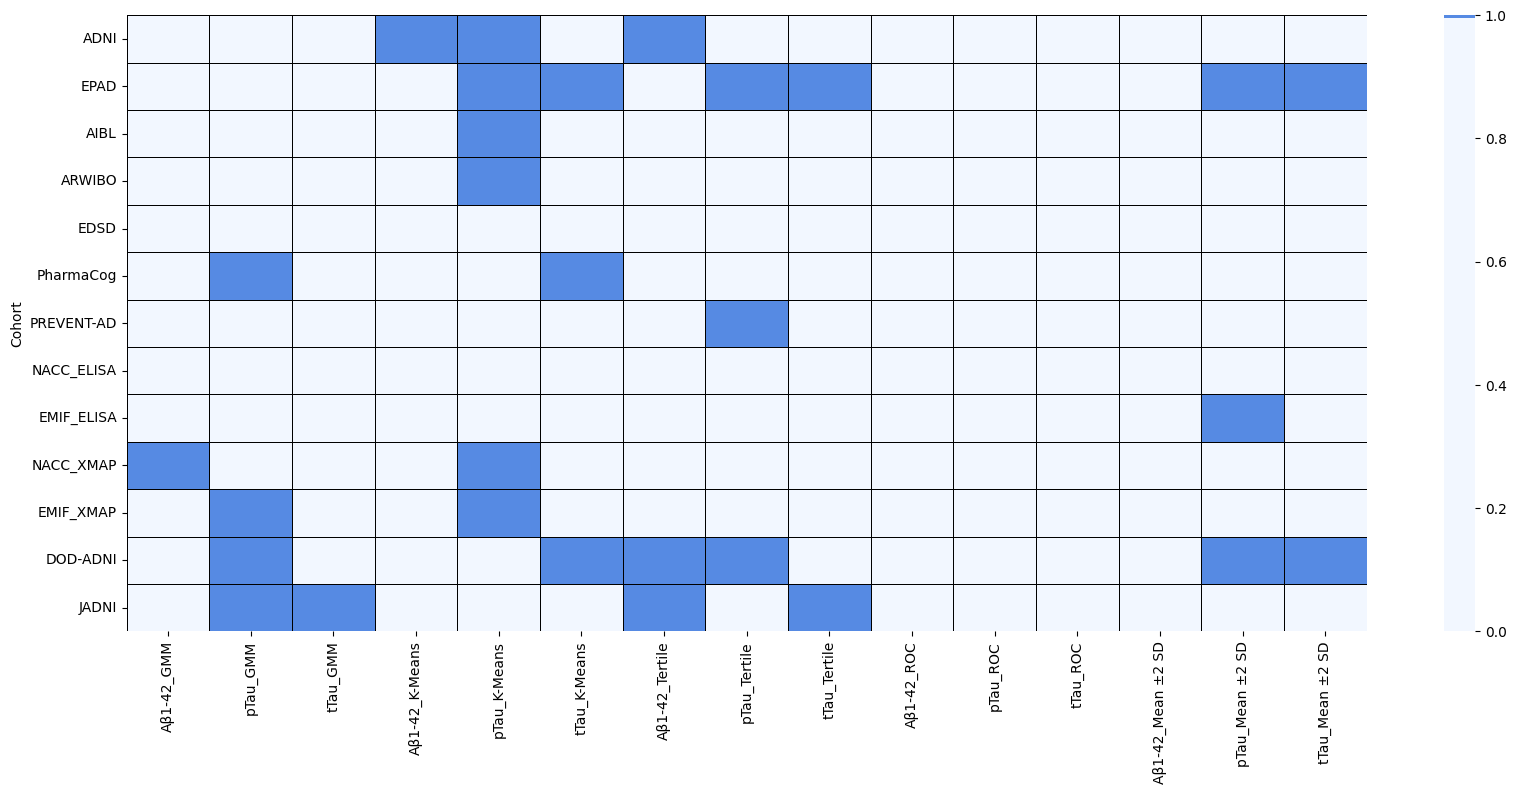

In [23]:
plt.figure(figsize=(20, 8))
sns.heatmap(within.astype(float), cmap=['#f2f7ff','#568ae3'], center=1, linewidths=0.5, linecolor='black')

In [36]:
# for i in percentage.index:
#     for col in percentage.columns:
#         if percentage.loc[i, col]!= '-' and float(percentage.loc[i, col])>1:
#             print(i, col)
        

In [40]:
a = list()
t = list()
n = list()
for i in percentage.columns:
    if 'Aβ1-42' in i:
        a.append(i)
    elif 'tTau'in i:
        t.append(i)
    else:
        n.append(i)

In [52]:
percentage[n]

,pTau_GMM,pTau_K-Means,pTau_Tertile,pTau_ROC,pTau_Mean ±2 SD
Cohort,,,,,
ADNI,0.64,0.25,0.5,0.85,0.53
EPAD,0.33,0.22,0.28,3.02,0.43
AIBL,2.39,1.81,-,-,-
ARWIBO,8.85,0.72,-,-,-
EDSD,2.59,1.61,-,-,-
PREVENT-AD,2.46,0.9,0.52,-,0.87
PharmaCog,0.61,1.71,-,-,-
NACC_ELISA,1.99,0.69,0.55,1.16,1.11
EMIF_ELISA,0.46,0.27,0.39,1.51,1.08


In [28]:
percentage.max(axis=1)

Cohort
ADNI          1.40
EPAD          3.39
AIBL          2.75
ARWIBO        8.85
EDSD          2.95
PREVENT-AD    4.84
PharmaCog     5.85
NACC_ELISA    4.33
EMIF_ELISA    2.56
NACC_XMAP     8.67
EMIF_XMAP     6.02
DOD-ADNI      2.66
JADNI         1.93
dtype: float64

In [29]:
percentage.min(axis=1)

Cohort
ADNI          0.19
EPAD          0.13
AIBL             -
ARWIBO           -
EDSD             -
PREVENT-AD       -
PharmaCog        -
NACC_ELISA    0.39
EMIF_ELISA    0.24
NACC_XMAP     0.38
EMIF_XMAP     0.52
DOD-ADNI         -
JADNI         0.41
dtype: object

In [38]:
percentage.max(axis=0)

Aβ1-42_GMM           4.84
pTau_GMM             8.85
tTau_GMM             6.02
Aβ1-42_K-Means       1.56
pTau_K-Means         1.81
tTau_K-Means         2.75
Aβ1-42_Tertile       0.92
pTau_Tertile         1.54
tTau_Tertile         1.37
Aβ1-42_ROC           1.51
pTau_ROC             3.02
tTau_ROC             3.39
Aβ1-42_Mean ±2 SD    8.67
pTau_Mean ±2 SD      1.58
tTau_Mean ±2 SD      2.56
dtype: object

In [11]:
# test = pd.read_csv("/home/yasamin/Downloads/seven_cohort_features.csv", index_col=0)

In [27]:
# len(test.iloc[:-4]['0'].to_list())

105